# ClimateWins Project

## Content
### 1. Importing libraries and data
### 2. Splitting the data
### 3. Randome Forest Optimization
### 3.1. Grid Search
### 3.2 Randome Search
### 4. Applying Random Forest Classifier using hyperparameters resulted from optimization

## 1. Importing libraries and data

In [4]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from numpy import argmax
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

In [5]:
# Create a path
path="C:/Users/Oksana Stepanova/OneDrive/Документи/ClimateWins/Unsupervised/02 Data/"

In [6]:
# Import weather data, cleaned file
df=pd.read_csv(os.path.join(path, 'Prepared Data', 'weather_cleaned.csv'))

In [7]:
df.head(1)

,Unnamed: 0,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,...,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,10.9,...,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9


In [8]:
# Remove irrelevant column
df=df.drop(columns=['Unnamed: 0'])

In [9]:
df.shape

(22950, 135)

In [10]:
df.head(1)

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,...,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,10.9,1,...,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9


In [11]:
# Import Pleasant weather data, cleaned file
df_ans=pd.read_csv(os.path.join(path, 'Prepared Data', 'weather_answers_cleaned.csv'))

In [12]:
df_ans.head(1)

,Unnamed: 0,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
# Remove irrelevant column
df_ans=df_ans.drop(columns=['Unnamed: 0'])

In [14]:
df_ans.head(1)

,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
df_ans.shape

(22950, 15)

## 2. Splitting the data

#### Creating a subset

In [18]:
# Create a pattern 
pattern_basel=r'(BASEL)'

# Filter the columns
columns_basel=df.filter(regex=pattern_basel).columns

In [19]:
columns_basel.shape

(9,)

In [20]:
columns_basel

Index(['BASEL_cloud_cover', 'BASEL_humidity', 'BASEL_pressure',
       'BASEL_global_radiation', 'BASEL_precipitation', 'BASEL_sunshine',
       'BASEL_temp_mean', 'BASEL_temp_min', 'BASEL_temp_max'],
      dtype='object')

In [21]:
df_1=df[columns_basel]

In [22]:
df_1.shape

(22950, 9)

In [23]:
df_1.head(1)

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max
0,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,10.9


In [24]:
df_ans_1=df_ans[['BASEL_pleasant_weather']]

In [25]:
df_ans_1.shape

(22950, 1)

In [26]:
df_ans_1.head(1)

,BASEL_pleasant_weather
0,0


#### Splitting data

In [28]:
# Create an 'X' matrix
X = df_1.to_numpy()
y = df_ans_1.max(axis=1)

In [29]:
print(X.shape)
print(y.shape)

(22950, 9)
(22950,)


In [30]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [31]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(18360, 9) (18360,)
(4590, 9) (4590,)


## 3. Randome Forest Optimization

### 3.1. Grid Search

In [34]:
# creating a RF classifier
clf = RandomForestClassifier()

In [35]:
# Grid search cv
grid_space={'max_depth':[3,5,7,10,15,None],
              'n_estimators':[50,100,200],
              'max_features':[1, 3, 5, 7,'sqrt','log2'],
              'min_samples_leaf':[1,2,3,4,5],
              'min_samples_split':[2,3,4,5]
           }

In [36]:
start = time.time()
grid = GridSearchCV(clf,param_grid=grid_space,cv=3,scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 2160 candidates, totalling 6480 fits
Search took 27.07801502943039 minutes


In [37]:
# grid search results
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best GRID search score is: 1.0


### 3.2 Randome Search

In [39]:
# Random search cv
rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'n_estimators':np.arange(50, 500, step=50),
              'max_features':randint(1,7),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }

In [40]:
# creating a RF classifier
clf2= RandomForestClassifier()

In [41]:
start = time.time()
rf_random = RandomizedSearchCV(clf2, rs_space, n_iter=200, scoring='accuracy', verbose=3, n_jobs=-1, cv=3) 
model_random = rf_random.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 200 candidates, totalling 600 fits
Search took 5.209545203049978 minutes


In [42]:
# random random search results
print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 6, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 50}
Best RANDOM search score is: 1.0


## 4. Applying Random Forest Classifier using hyperparameters resulted from optimization

### 4.1. Random Forest using the results from Grid Search - BASEL weather station

In [45]:
# creating a RF classifier with the results from Grid Search
clf3 = RandomForestClassifier(n_estimators = 50, max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=3)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf3.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, max_features=7, min_samples_split=3,
                       n_estimators=50)

In [46]:
# performing predictions on the test dataset
y_pred = clf3.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  1.0


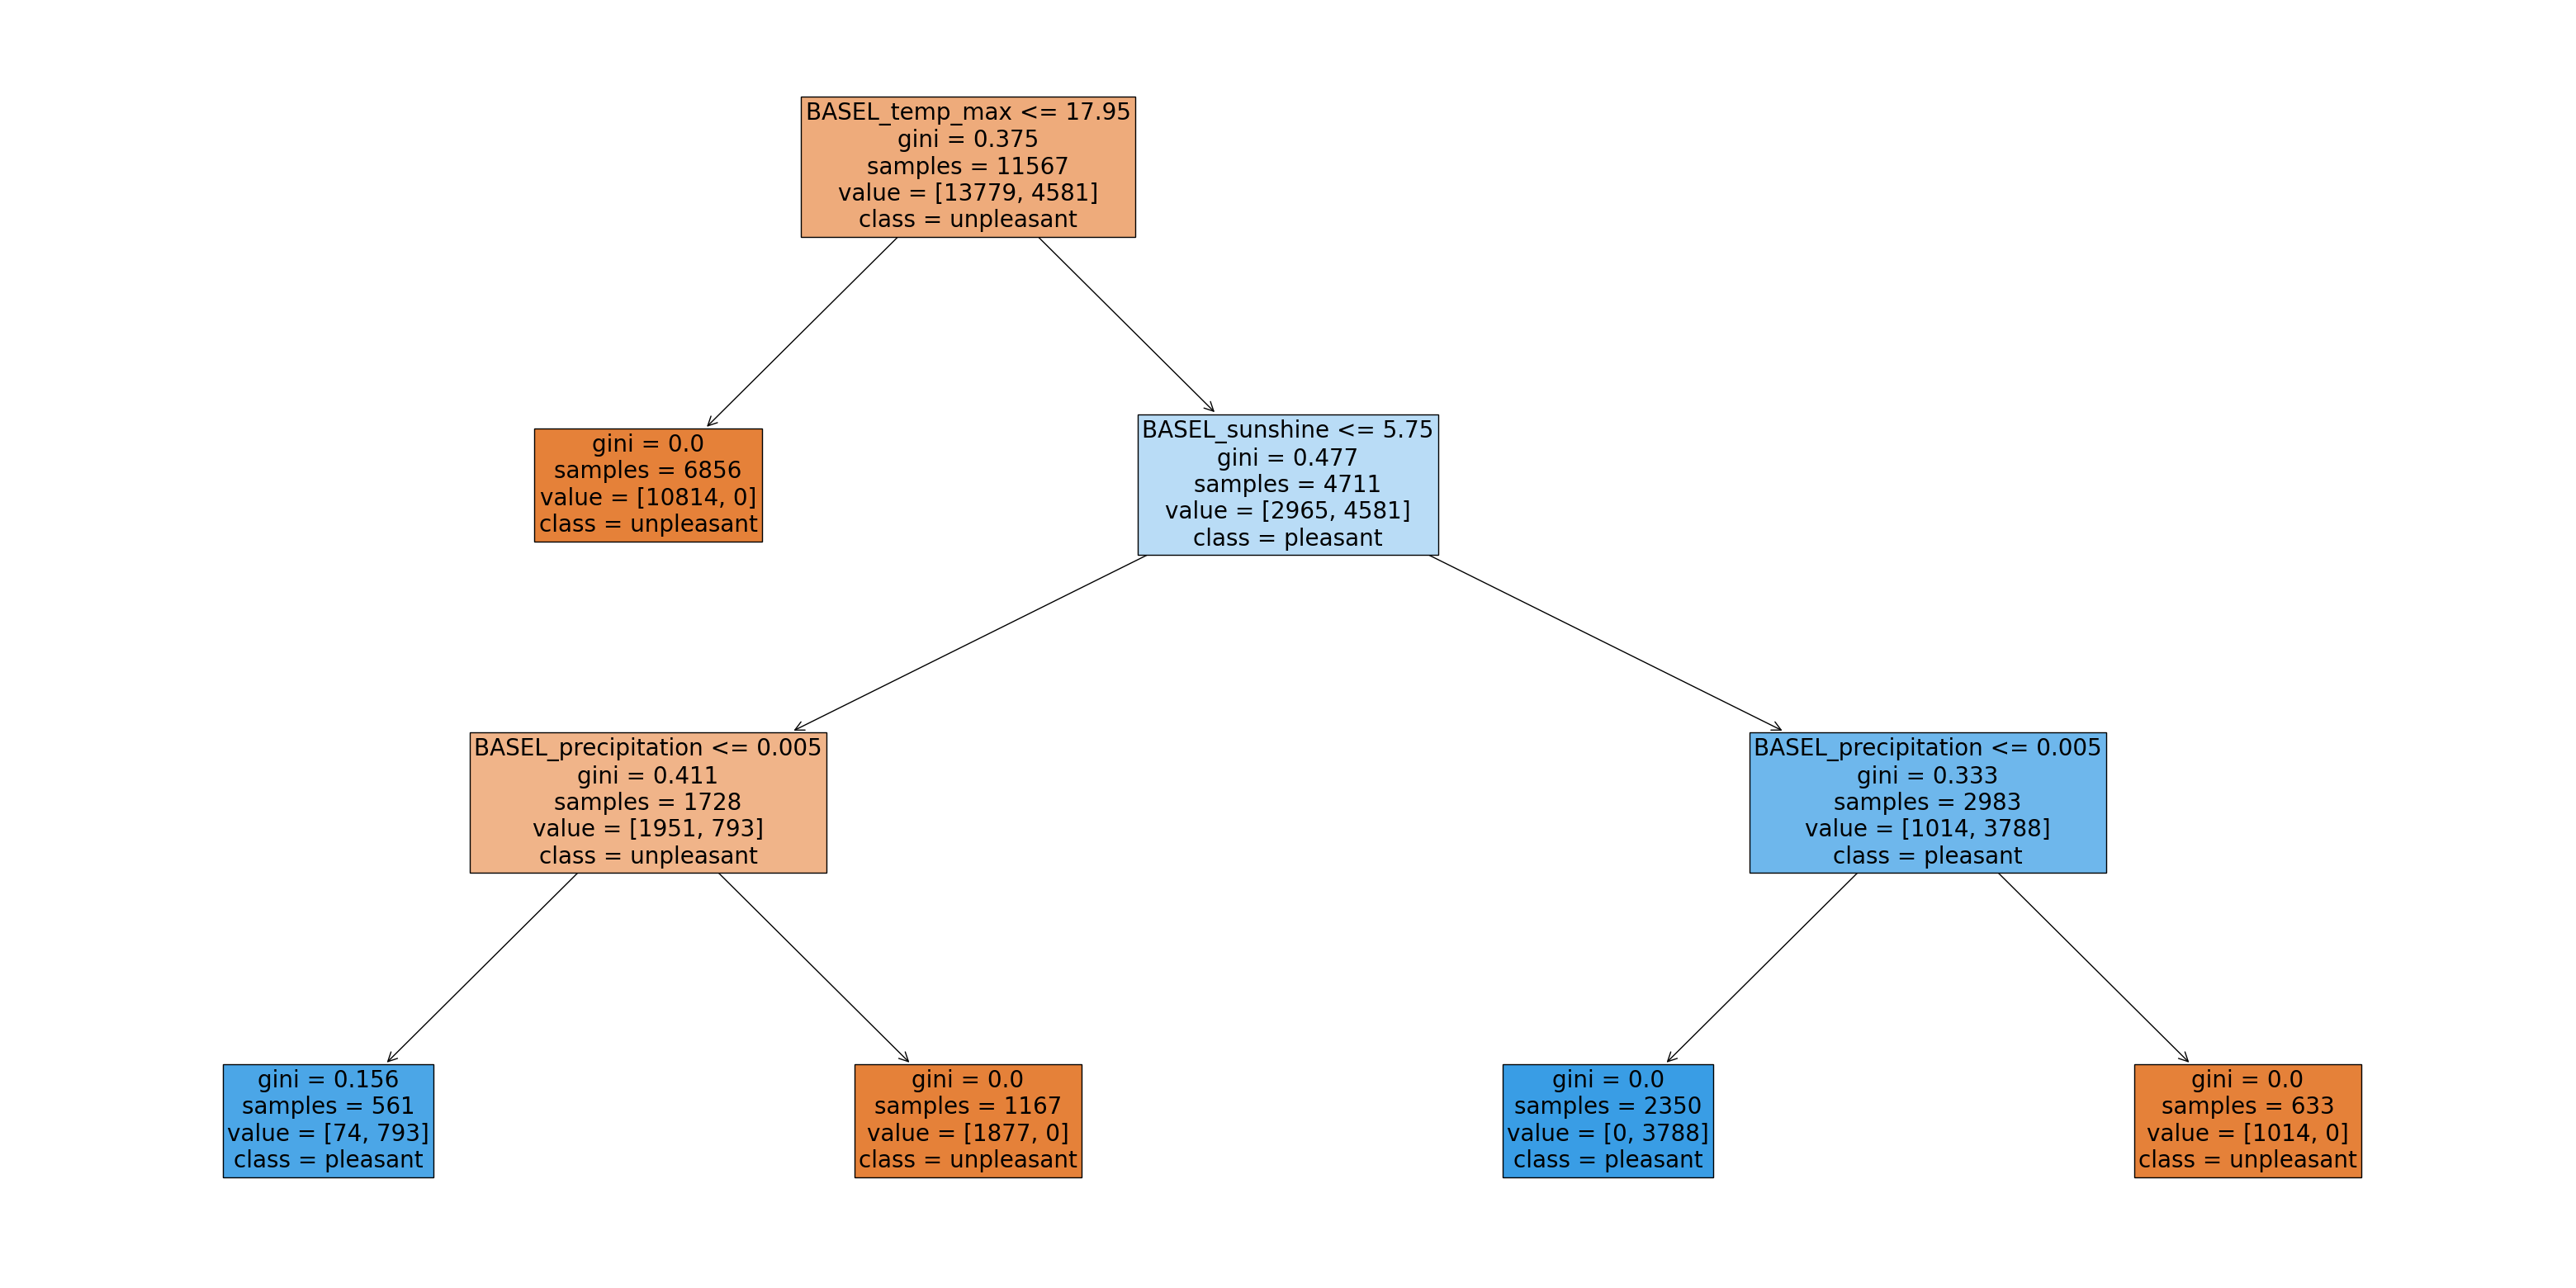

In [49]:
fig_1 = plt.figure(figsize=(40,20))
plot_tree(clf3.estimators_[5], fontsize = 20, feature_names=df_1.columns, class_names=['unpleasant', 'pleasant'],  filled=True);

In [50]:
# Create a path
path_viz="C:/Users/Oksana Stepanova/OneDrive/Документи/ClimateWins/Unsupervised/04 Analysis/Visualizations"

In [51]:
fig_1.savefig(f"{path_viz}/ramdom_tree_BASEL_opt_grid.png")

In [52]:
# Retrieve feature importances from the trained model
feature_importances_1 = clf3.feature_importances_
print("Feature Importances BASEL:", feature_importances_1)
print(feature_importances_1.shape)

Feature Importances BASEL: [0.00290653 0.         0.         0.08382692 0.45411718 0.04135749
 0.01430138 0.         0.40349051]
(9,)


In [53]:
indicators=[
    "cloud cover",
    "humidity",
    "pressure",
    "global radiation",
    "precipitation",
    "sunshine",
    "temp mean",
    "temp min",
    "temp max"
]

In [54]:
# Create a dataframe to associate observation measurements with their importances
importances_df_1 = pd.DataFrame({
    'Indicators': indicators,
    'Importance': feature_importances_1
})

In [55]:
# Sort by importance for chart readability
importances_df_1= importances_df_1.sort_values(by='Importance', ascending=False)
print("Feature Importance BASEL:")
print(importances_df_1)

Feature Importance BASEL:
         Indicators  Importance
4     precipitation    0.454117
8          temp max    0.403491
3  global radiation    0.083827
5          sunshine    0.041357
6         temp mean    0.014301
0       cloud cover    0.002907
1          humidity    0.000000
2          pressure    0.000000
7          temp min    0.000000


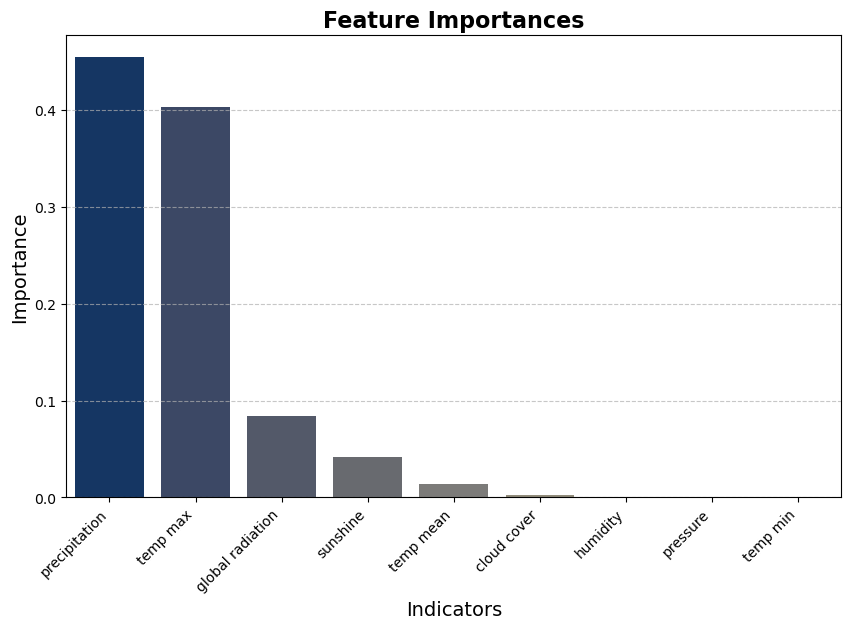

In [56]:
# Create a figure and axis object
fig_1, ax = plt.subplots(figsize=(10, 6))

# Plot the bar chart
sns.barplot(ax=ax, x=importances_df_1['Indicators'], y=importances_df_1['Importance'], palette='cividis')

# Add titles and labels
ax.set_title('Feature Importances', fontsize=16, fontweight='bold')
ax.set_xlabel('Indicators', fontsize=14)
ax.set_ylabel('Importance', fontsize=14)

# Rotate x labels if they are too long
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Add grid for better visualization
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

In [57]:
# Export the plot
fig_1.savefig(f"{path_viz}/Weather_indicators_BASEL_opt_grid.png")

### 4.2. Random Forest using the results from Random Search - BASEL weather station

In [58]:
# creating a RF classifier with the results from Random Search
clf4 = RandomForestClassifier(n_estimators = 50, max_depth=10, max_features=6, min_samples_leaf=2, min_samples_split=6, criterion = 'entropy')  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf4.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features=6,
                       min_samples_leaf=2, min_samples_split=6,
                       n_estimators=50)

In [59]:
# performing predictions on the test dataset
y_pred = clf4.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  1.0


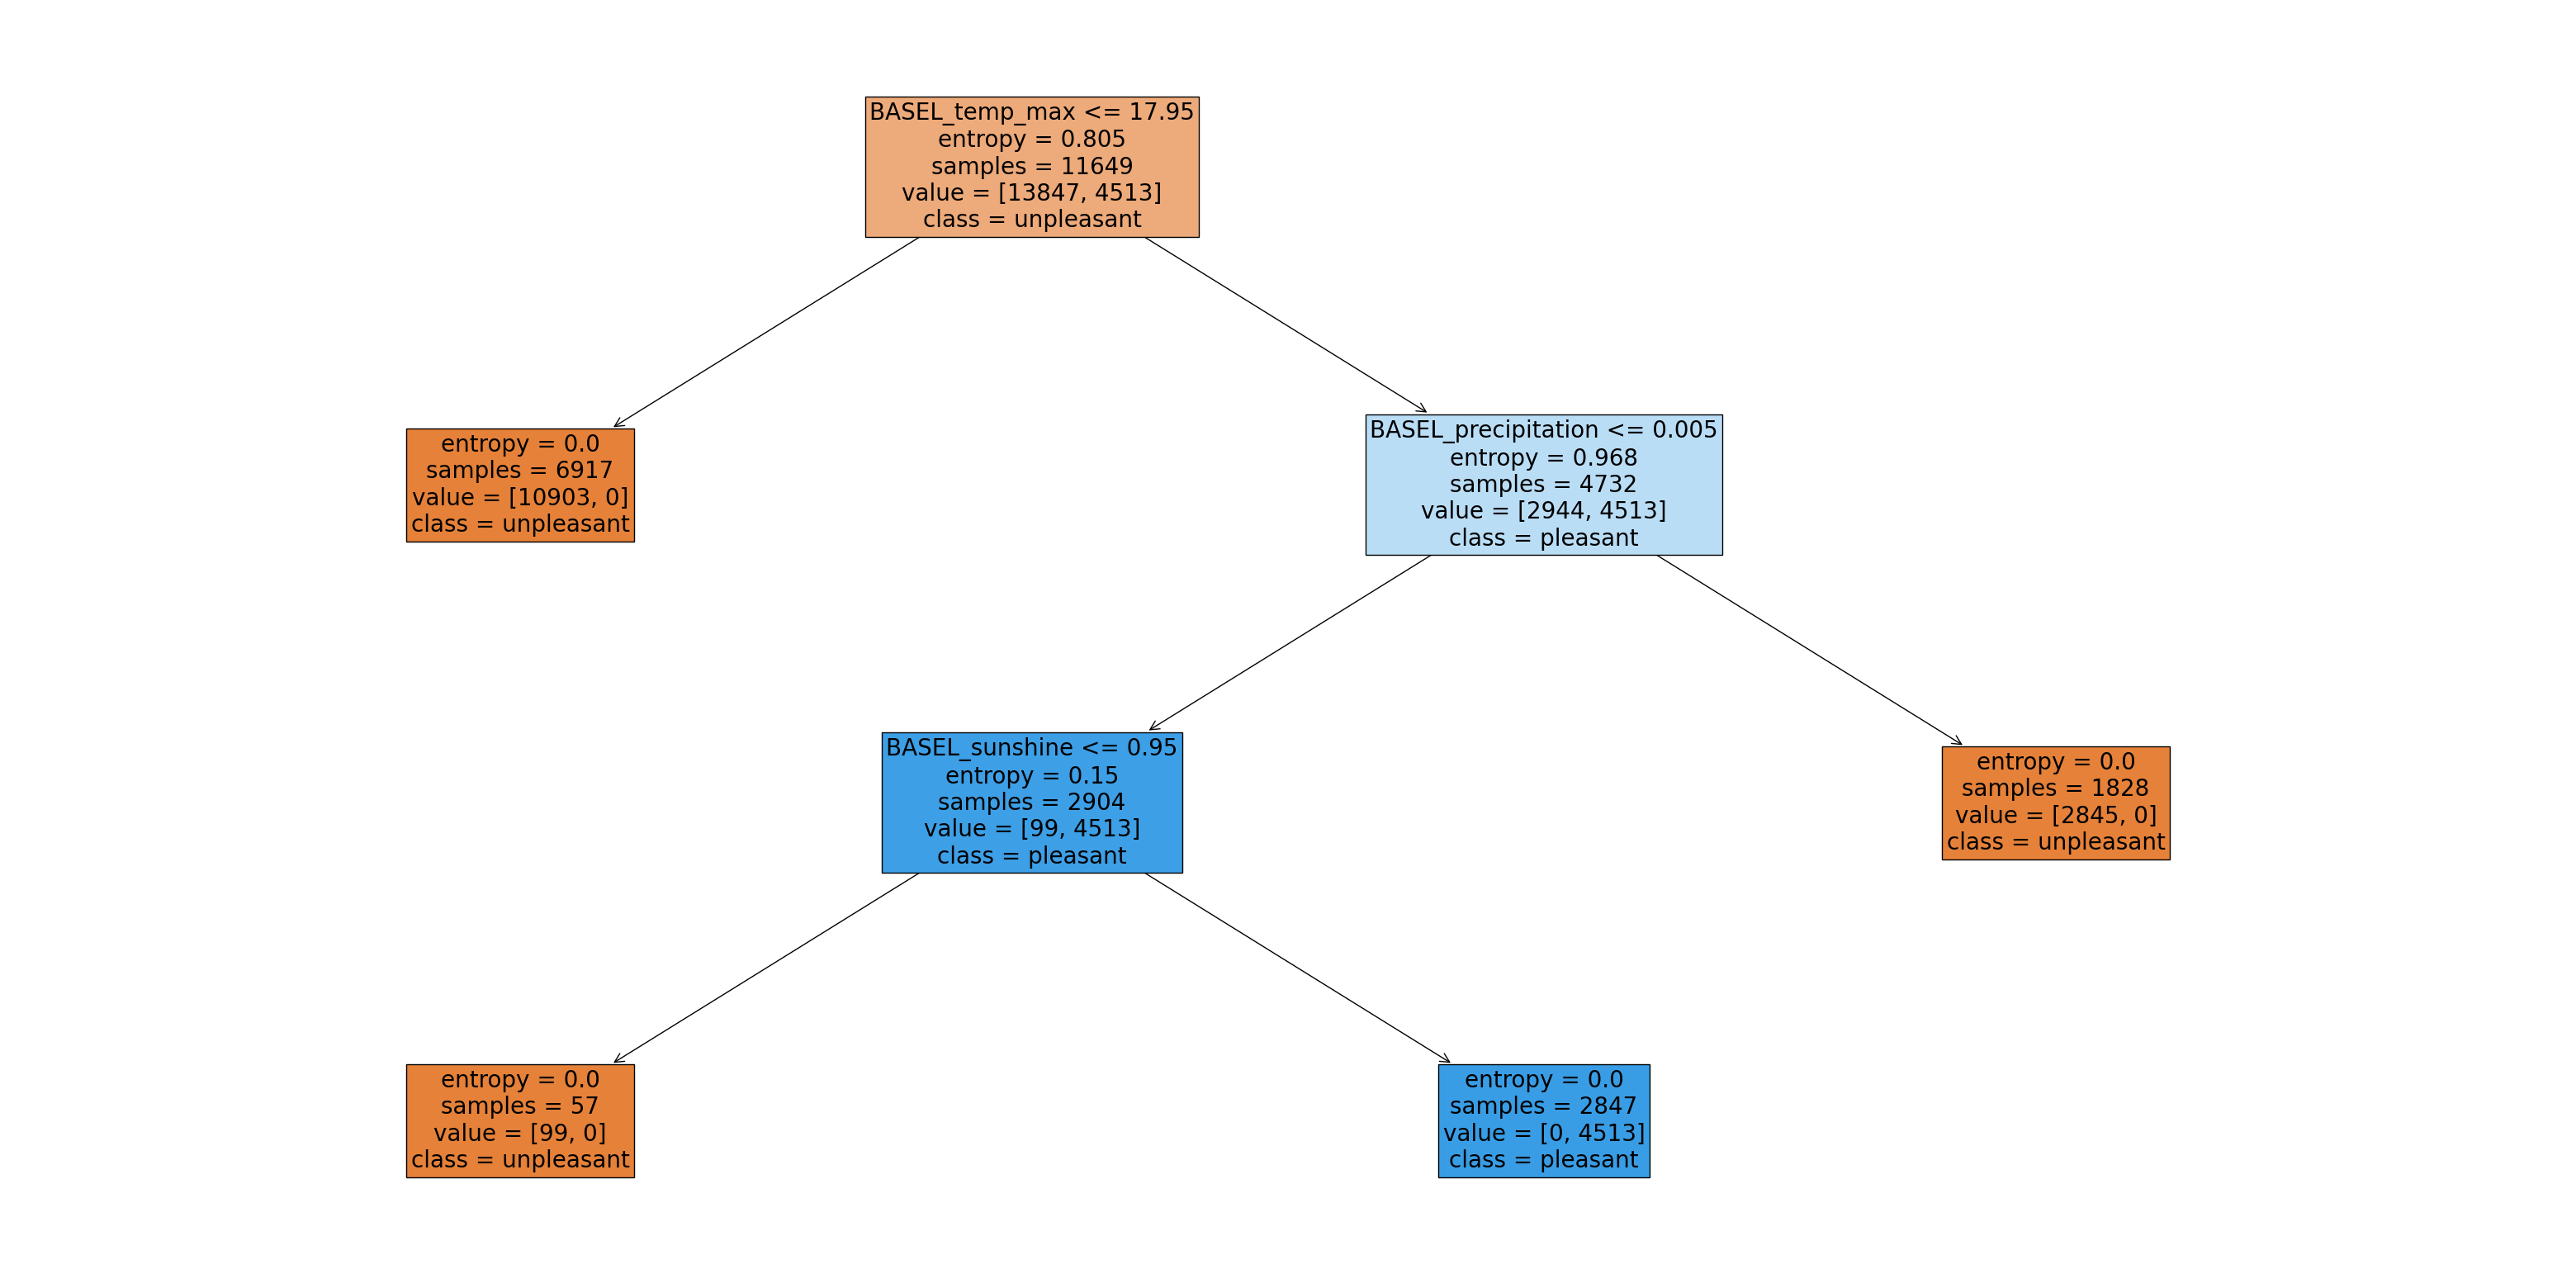

In [60]:
fig_2 = plt.figure(figsize=(40,20))
plot_tree(clf4.estimators_[5], fontsize = 20, feature_names=df_1.columns, class_names=['unpleasant', 'pleasant'],  filled=True);

In [61]:
fig_2.savefig(f"{path_viz}/ramdom_tree_BASEL_opt_random.png")

In [62]:
# Retrieve feature importances from the trained model
feature_importances_2 = clf4.feature_importances_
print("Feature Importances BASEL:", feature_importances_2)
print(feature_importances_2.shape)

Feature Importances BASEL: [8.75866891e-03 3.18310784e-04 1.14182639e-03 1.42413144e-02
 3.86994689e-01 7.57893504e-02 8.95290757e-02 7.49025084e-04
 4.22477739e-01]
(9,)


In [63]:
# Create a dataframe to associate observation measurements with their importances
importances_df_2 = pd.DataFrame({
    'Indicators': indicators,
    'Importance': feature_importances_2
})

In [64]:
# Sort by importance for chart readability
importances_df_2= importances_df_2.sort_values(by='Importance', ascending=False)
print("Feature Importance BASEL:")
print(importances_df_2)

Feature Importance BASEL:
         Indicators  Importance
8          temp max    0.422478
4     precipitation    0.386995
6         temp mean    0.089529
5          sunshine    0.075789
3  global radiation    0.014241
0       cloud cover    0.008759
2          pressure    0.001142
7          temp min    0.000749
1          humidity    0.000318


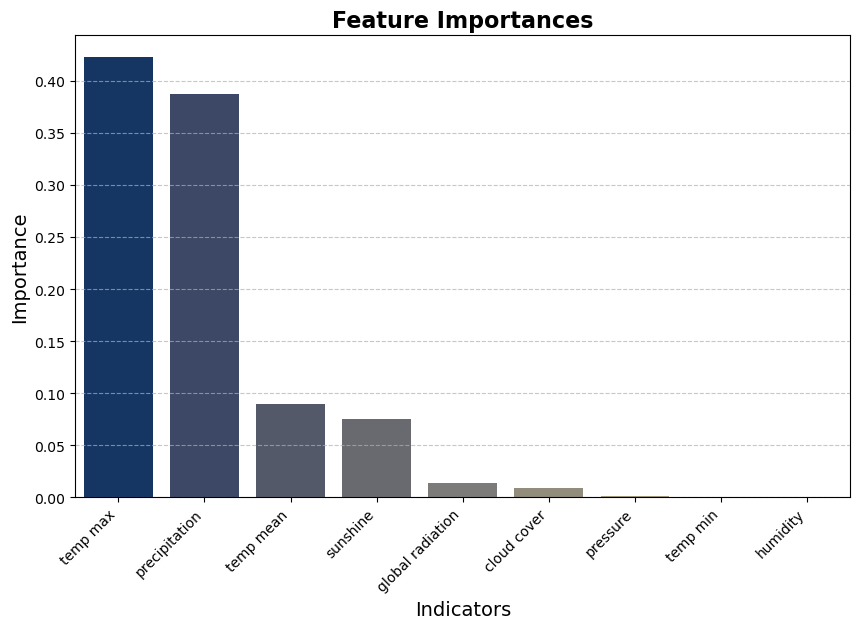

In [65]:
# Create a figure and axis object
fig_3, ax = plt.subplots(figsize=(10, 6))

# Plot the bar chart
sns.barplot(ax=ax, x=importances_df_2['Indicators'], y=importances_df_2['Importance'], palette='cividis')

# Add titles and labels
ax.set_title('Feature Importances', fontsize=16, fontweight='bold')
ax.set_xlabel('Indicators', fontsize=14)
ax.set_ylabel('Importance', fontsize=14)

# Rotate x labels if they are too long
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Add grid for better visualization
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

In [66]:
# Export the plot
fig_3.savefig(f"{path_viz}/Weather_indicators_BASEL_opt_random.png")